In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

In [2]:
#acquire
df = acquire.get_store_item_demand_data()

#prepare
df = prepare.prep_store_data(df)
df.head(5)

,item_id,quantity,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,294.00


In [3]:
df.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

## Split the data

In [4]:
#look at the range of the index 
#four total years of data 
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

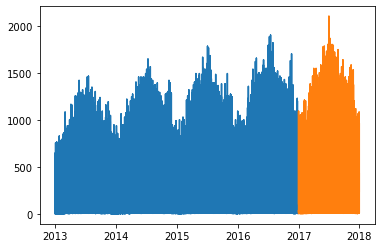

In [5]:
#train test split 
#75% train, 25% test 
#split the data with everything up to 2016 
#test is only 2017 
train = df[:'2016'] 
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

Key Takeaways:
- 3 years of training data, 1 year of test data
- Test data is most recent

In [6]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

In [7]:
train.groupby('month').describe()

item_id                                               quantity  \
          count  mean        std  min   25%   50%   75%   max    count   
month                                                                    
01-Jan  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
02-Feb  56500.0  25.5  14.430997  1.0  13.0  25.5  38.0  50.0  56500.0   
03-Mar  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
04-Apr  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
05-May  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
06-Jun  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
07-Jul  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
08-Aug  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
09-Sep  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
10-Oct  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
11-Nov  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
12-Dec  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   

                   ...    item_upc14               sales_total              \
             mean  ...           75%           max       count        mean   
month              ...                                                       
01-Jan  34.449081  ...  6.030842e+11  8.846237e+11     62000.0  185.232810   
02-Feb  38.138195  ...  6.030842e+11  8.846237e+11     56500.0  205.001723   
03-Mar  45.863145  ...  6.030842e+11  8.846237e+11     62000.0  246.694359   
04-Apr  53.293417  ...  6.030842e+11  8.846237e+11     60000.0  286.463914   
05-May  57.447597  ...  6.030842e+11  8.846237e+11     62000.0  308.932679   
06-Jun  61.038117  ...  6.030842e+11  8.846237e+11     60000.0  328.098415   
07-Jul  64.854839  ...  6.030842e+11  8.846237e+11     62000.0  348.595409   
08-Aug  57.326645  ...  6.030842e+11  8.846237e+11     62000.0  308.319972   
09-Sep  53.253233  ...  6.030842e+11  8.846237e+11     60000.0  286.252615   
10-Oct  49.618710  ...  6.030842e+11  8.846237e+11     62000.0  266.773078   
11-Nov  53.541983  ...  6.030842e+11  8.846237e+11     60000.0  287.761324   
12-Dec  37.994161  ...  6.030842e+11  8.846237e+11     62000.0  204.265461   

                                                           
               std   min     25%     50%     75%      max  
month                                                      
01-Jan  145.229766  0.00   66.23  159.40  268.15  1093.20  
02-Feb  160.234470  1.68   73.06  176.22  295.74  1065.87  
03-Mar  191.781349  3.00   89.10  212.39  354.38  1421.16  
04-Apr  222.392366  5.04  103.59  247.26  411.60  1658.02  
05-May  239.286350  5.04  112.40  267.24  444.86  1512.26  
06-Jun  253.623315  5.04  119.07  283.65  472.29  1667.13  
07-Jul  269.758461  5.88  126.36  301.32  503.40  1903.99  
08-Aug  238.639841  4.20  112.40  267.00  443.44  1557.81  
09-Sep  221.852486  4.20  103.62  247.59  411.60  1466.71  
10-Oct  207.425551  3.36   96.16  228.80  384.48  1430.27  
11-Nov  222.847403  4.20  104.16  248.40  414.70  1703.57  
12-Dec  159.443617  0.84   73.06  176.19  294.15  1229.85  

[12 rows x 72 columns]

<AxesSubplot:xlabel='sale_date'>

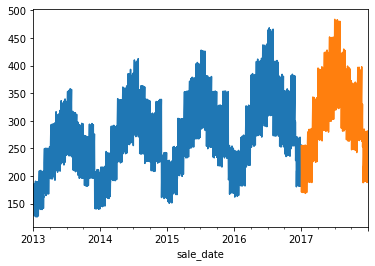

In [8]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

<AxesSubplot:xlabel='month', ylabel='sales_total'>

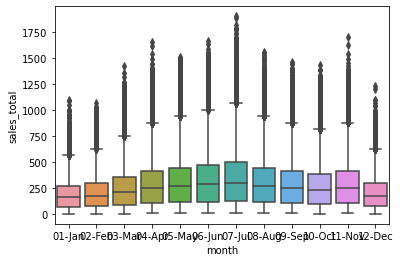

In [9]:
# boxplot for each month
sns.boxplot(data = train, x = 'month', y = 'sales_total')

[Text(0.5, 1.0, 'Average Sales by Day of Week')]

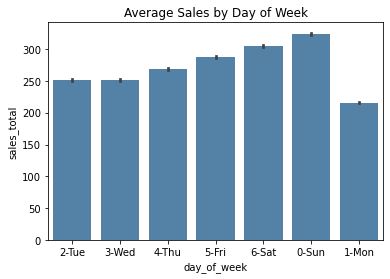

In [10]:
sns.barplot(data=train, x='day_of_week', y='sales_total', color='steelblue')\
    .set(title='Average Sales by Day of Week')

Takeways:
- Increase from Thurs - Sun, Sunday being highest
- Drops off at its lowest on Mon
- Tues and Weds same total

<AxesSubplot:xlabel='sale_date'>

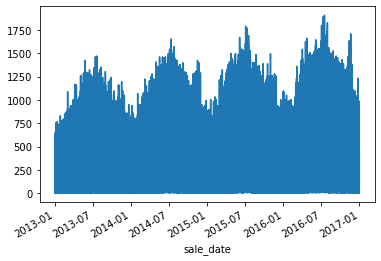

In [11]:
y.plot()

Takeways:

    - sales increase over time

### Resample your data and visualize it.

<AxesSubplot:title={'center':'Quarterly average'}, xlabel='sale_date'>

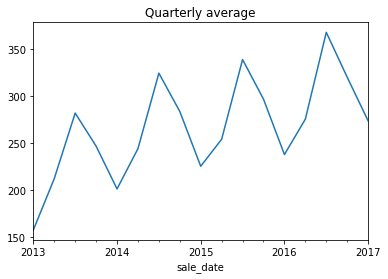

In [12]:
#resampling by quarterly (3 months)
y.resample('3M').mean().plot(title='Quarterly average')

<AxesSubplot:title={'center':'Monthly average'}, xlabel='sale_date'>

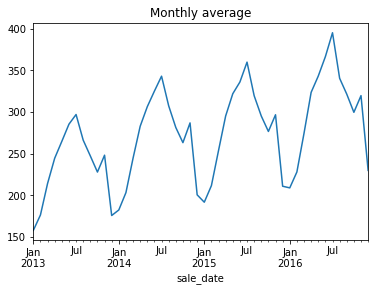

In [13]:
#resampling by month
y.resample('M').mean().plot(title='Monthly average')

In [14]:
### Creating a rolling (moving) average of your data and visualize it.
y = y.resample('D').mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

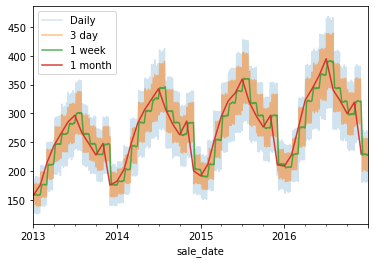

In [15]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
y.resample('M').mean().plot(alpha=.9, label='1 month')
plt.legend()

<AxesSubplot:title={'center':'Daily Difference in Sales Totals'}, xlabel='sale_date'>

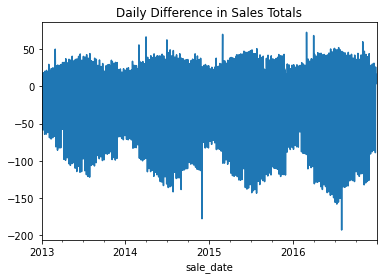

In [16]:
### Plot the difference in sales from one day to the next.
y.diff().plot(title='Daily Difference in Sales Totals')

<AxesSubplot:title={'center':'Daily % Change in Temperature'}, xlabel='sale_date'>

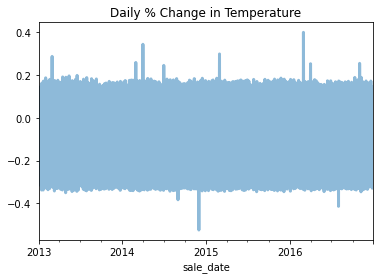

In [17]:
#taking the y.shift()and divide from the diff number it gives us the overall % of the daily sales
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='Daily % Change in Temperature')

In [18]:
### Plot the % difference in sales from one week to the next.
#let's try resampling by week
y.resample('W').mean().diff()

sale_date
2013-01-06          NaN
2013-01-13    -3.607964
2013-01-20    -2.034483
2013-01-27     0.598663
2013-02-03     9.039631
                ...    
2016-12-04   -56.861163
2016-12-11   -35.209103
2016-12-18     0.738749
2016-12-25    -0.067643
2017-01-01    -8.951823
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

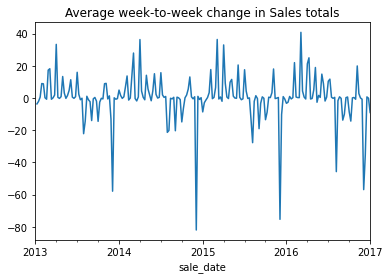

In [19]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in Sales totals');

In [20]:
### Plot the % difference in sales from one month to the next.
#resampling by month
y.resample('M').mean().diff()

sale_date
2013-01-31          NaN
2013-02-28    18.517132
2013-03-31    37.769795
2013-04-30    30.278432
2013-05-31    20.203041
2013-06-30    20.598156
2013-07-31    11.619962
2013-08-31   -30.697866
2013-09-30   -18.945681
2013-10-31   -19.369630
2013-11-30    20.240592
2013-12-31   -72.354964
2014-01-31     6.657099
2014-02-28    20.796331
2014-03-31    41.281869
2014-04-30    38.297100
2014-05-31    23.481447
2014-06-30    18.697838
2014-07-31    17.883724
2014-08-31   -35.503634
2014-09-30   -25.995036
2014-10-31   -18.216658
2014-11-30    23.687264
2014-12-31   -86.282059
2015-01-31    -8.813771
2015-02-28    19.864632
2015-03-31    42.149552
2015-04-30    41.408218
2015-05-31    26.666064
2015-06-30    14.037112
2015-07-31    23.847224
2015-08-31   -40.262332
2015-09-30   -24.347260
2015-10-31   -18.516261
2015-11-30    20.010890
2015-12-31   -85.696837
2016-01-31    -1.985688
2016-02-29    19.076992
2016-03-31    46.389894
2016-04-30    49.094468
2016-05-31    19.524509
2016-0

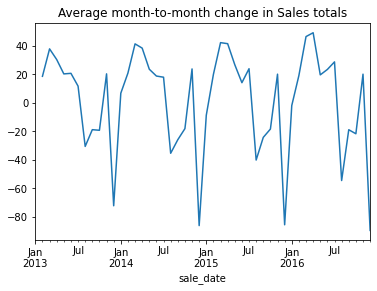

In [21]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in Sales totals');

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

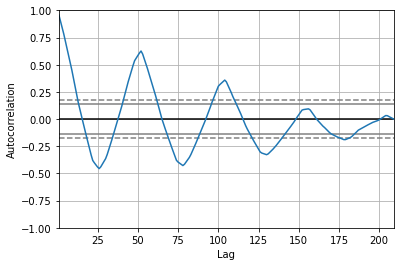

In [22]:
### Visualize an autocorrelation plot on a weekly resampling.
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [23]:
### Visualize a seasonal decomposition plot on a weekly resampling.
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [24]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

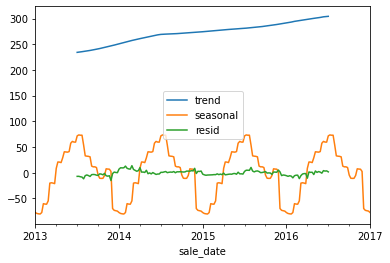

In [25]:
decomposition.iloc[:, 1:].plot()

# Time Series Visuals

## Target Over Time


<AxesSubplot:xlabel='sale_date'>

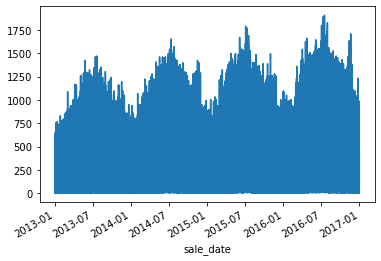

In [26]:
y = train.sales_total
y.plot()

## Target Mean over Periods of Time


<AxesSubplot:title={'center':'Weekly Average'}, xlabel='sale_date'>

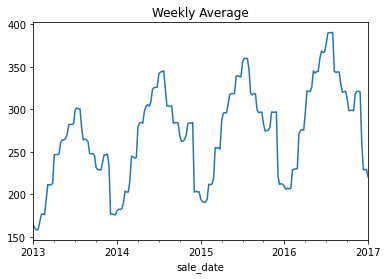

In [27]:
y.resample('W').mean().plot(title = 'Weekly Average')

<AxesSubplot:title={'center':'Monthly Average'}, xlabel='sale_date'>

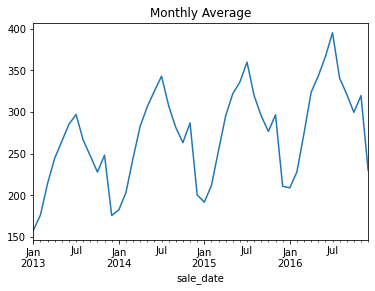

In [28]:
y.resample('M').mean().plot(title = 'Monthly Average')

## Visualize change in Target Over Time


<AxesSubplot:title={'center':'Weekly Sales Over Time'}, xlabel='sale_date'>

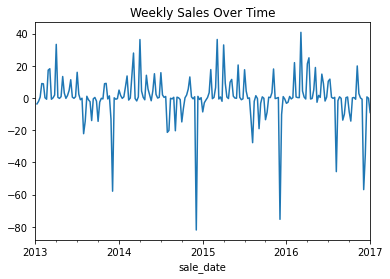

In [29]:
#week to week changes 
y.resample('W').mean().diff().plot(title='Weekly Sales Over Time')

<AxesSubplot:title={'center':'Monthly Sales Over Time'}, xlabel='sale_date'>

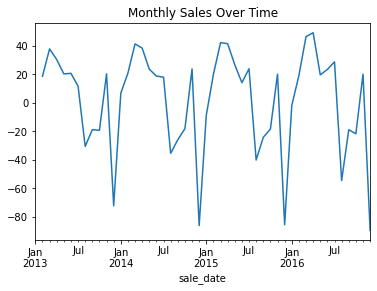

In [30]:
#monthly
y.resample('M').mean().diff().plot(title='Monthly Sales Over Time')

## Seasonal Plot

Text(0, 0.5, 'Total Sales $')

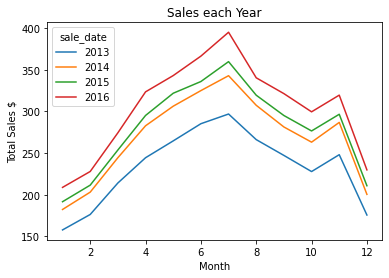

In [31]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Sales each Year')
plt.xlabel('Month')
plt.ylabel('Total Sales $')

## Seasonal Subseries Plots

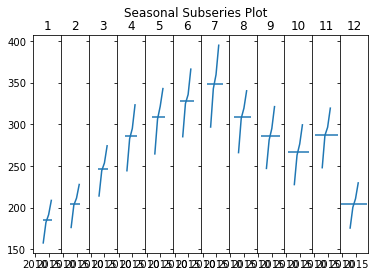

In [32]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

## LAG plots

Text(0.5, 1.0, 'Lag plot with lag=1')

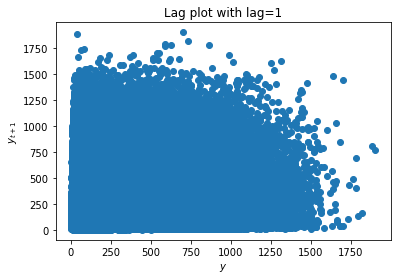

In [33]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

## Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

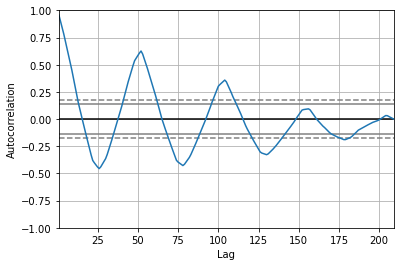

In [34]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

## OPS Data

Load your OPS data using your acquire and/or prepare functions.

In [35]:
df_ops = acquire.get_opsd_data()

df_ops = prepare.prep_opsd_data(df_ops)
df_ops.head(5)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006


In [36]:
df_ops.tail()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,12-Dec,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12-Dec,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12-Dec,2017
2017-12-30,1215.44897,721.247,7.467,728.714,12-Dec,2017
2017-12-31,1107.11488,721.176,19.980,741.156,12-Dec,2017


Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. Only use the train data set to perform the following tasks:

In [37]:
train = df_ops[:'2013'] # includes 2013
test = df_ops['2013':] 

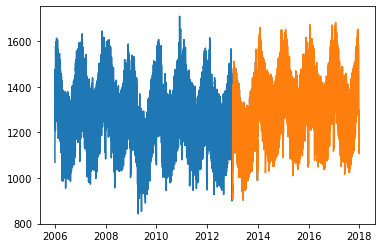

In [38]:
plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

<AxesSubplot:xlabel='date'>

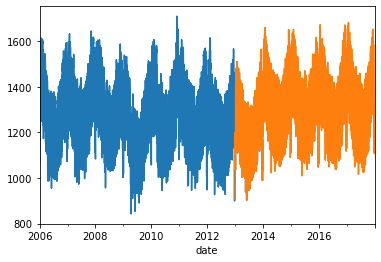

In [39]:
train.resample('D').consumption.mean().plot()
test.resample('D').consumption.mean().plot()

## Distribution

<AxesSubplot:title={'center':'Consumption Distribution'}, ylabel='Frequency'>

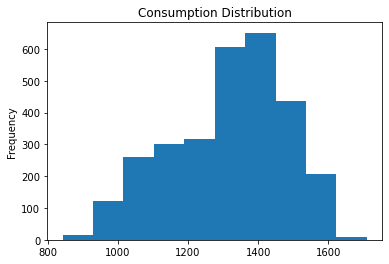

In [41]:
train.consumption.plot.hist(title = 'Consumption Distribution')

<AxesSubplot:xlabel='year'>

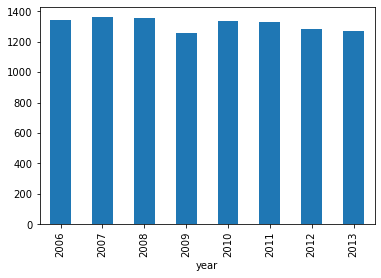

In [42]:
train.groupby('year').consumption.mean().plot.bar()

<AxesSubplot:title={'center':'Weekly Consumption'}, xlabel='date'>

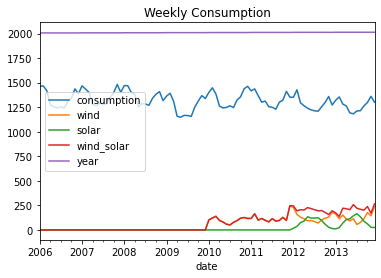

In [43]:
train.resample('M').mean().plot(title = 'Weekly Consumption')

<AxesSubplot:title={'center':'3 Month Average'}, xlabel='date'>

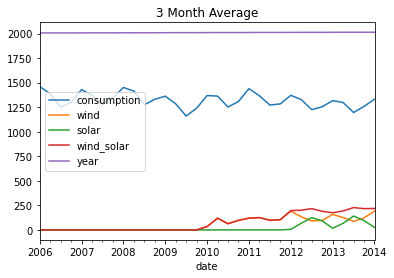

In [44]:
train.resample('3M').mean().plot(title = '3 Month Average')

<AxesSubplot:title={'center':'Average Weekly'}, xlabel='date'>

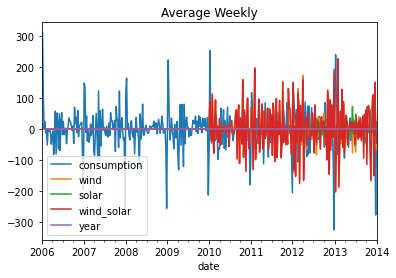

In [45]:
train.resample('W').mean().diff().plot(title='Average Weekly')

In [46]:
A = train.consumption
B = train.wind
C = train.solar 
D = train['wind_solar']

<AxesSubplot:title={'center':'Average Weekly Consumption'}, xlabel='date'>

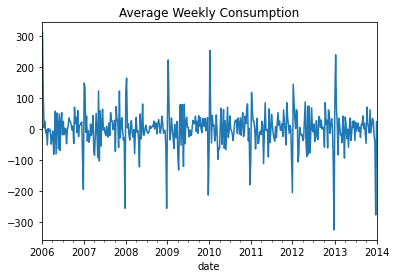

In [47]:
A.resample('W').mean().diff().plot(title='Average Weekly Consumption')

<AxesSubplot:title={'center':'Average Weekly Wind'}, xlabel='date'>

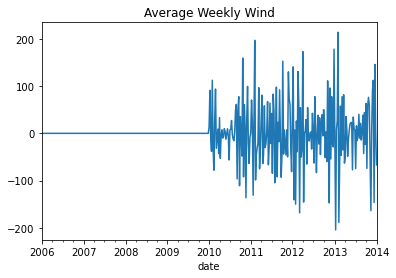

In [48]:
B.resample('W').mean().diff().plot(title='Average Weekly Wind')

<AxesSubplot:title={'center':'Average Weekly Solar'}, xlabel='date'>

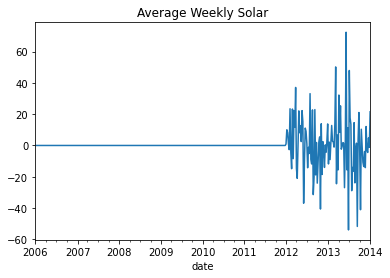

In [49]:
C.resample('W').mean().diff().plot(title='Average Weekly Solar')

<AxesSubplot:title={'center':'Average Weekly Wind plus Solar'}, xlabel='date'>

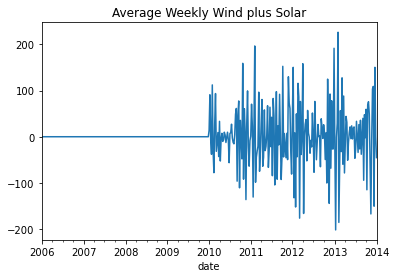

In [50]:
D.resample('W').mean().diff().plot(title='Average Weekly Wind plus Solar')

<AxesSubplot:title={'center':'Average Monthly Consumption'}, xlabel='date'>

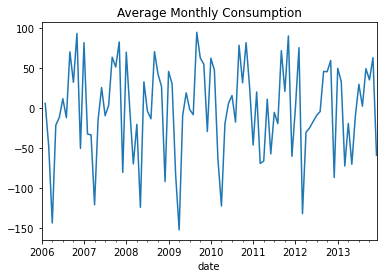

In [51]:
A.resample('M').mean().diff().plot(title='Average Monthly Consumption')

<AxesSubplot:title={'center':'Average Monthly Wind'}, xlabel='date'>

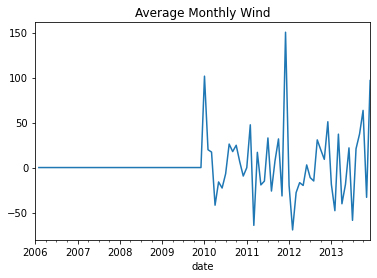

In [52]:
B.resample('M').mean().diff().plot(title='Average Monthly Wind')

<AxesSubplot:title={'center':'Average Monthly Solar'}, xlabel='date'>

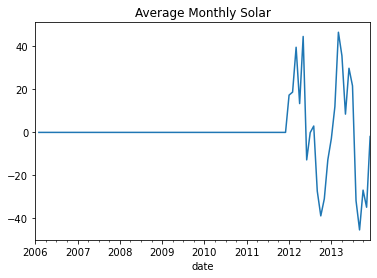

In [53]:
C.resample('M').mean().diff().plot(title='Average Monthly Solar')

<AxesSubplot:title={'center':'Average Monthly Wind and Solar'}, xlabel='date'>

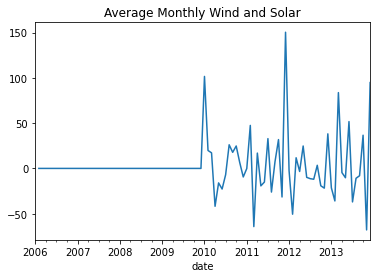

In [54]:
D.resample('M').mean().diff().plot(title='Average Monthly Wind and Solar')

Text(0, 0.5, 'Total Consumption')

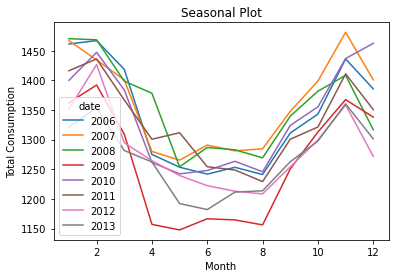

In [55]:
A.groupby([A.index.year, A.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.xlabel('Month')
plt.ylabel('Total Consumption')